In [1]:
from qiskit import*
from qiskit.visualization import plot_histogram


In [2]:
def create_bell_pair(qc, a, b):
    qc.h(a)
    qc.cx(a,b)
    

In [3]:
def encode_message(qc, qubit, msg):
    if (msg == "00"):
        pass
    elif msg == "10":
        qc.x(qubit)
    elif msg == "01":
        qc.z(qubit)
    elif msg == "11":
        qc.z(qubit)
        qc.x(qubit)
    else:
        print("Invalid Message: Sending '00'")

In [4]:
def decode_message(qc, a, b):
    qc.cx(a,b)
    qc.h(a)
    

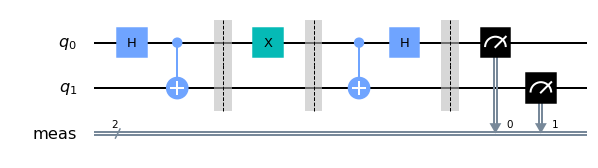

In [10]:
qc = QuantumCircuit(2)

create_bell_pair(qc, 0, 1)
qc.barrier()

message = "10"
encode_message(qc, 0, message)
qc.barrier()
decode_message(qc, 0, 1)
qc.measure_all()
qc.draw(output = 'mpl')

{'10': 1024}


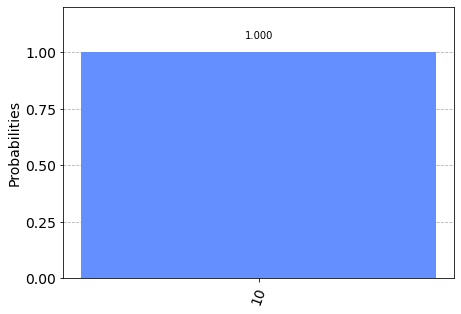

In [11]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 1024)
sim_result = job_sim.result()
measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

In [13]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 256

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2
                                      and not x.configuration().simulator
                                      and x.status().operational==True))
print("least busy backend: ", backend)
job = execute(qc, backend = backend, shots = shots)

/home/note/.local/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


least busy backend:  ibmqx2


In [14]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


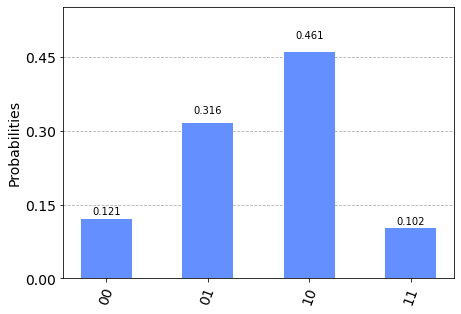

In [15]:
result = job.result()
plot_histogram(result.get_counts(qc))

In [ ]:
correct_results = results.get_counts(qc)[message]
accuracy  